# <u> PYTHON INDIVIDUAL COURSEWORK - COMPANIES HOUSE UK API </u>

This submission is by Clarin Preetika D Souza

## Table of Contents


1. **[Configuration](#config)**
  
 - 1.1 [Import Libraries](#lib)
 - 1.2 [Set Options](#opt)
<br></br> 
 
2. **[Data Preparation](#prep)**
  
 - 2.1 [API Calls](#api)
 - 2.2 [Pre Process](#pre_process) 
<br></br>  
 
3. **[Data Visualisation](#visual)**

 - 3.1 [Frequency Distribution](#FD)
 - 3.2 [Scatter Plot](#SP)
 - 3.3 [Folium Map Plot](#FMP)
 - 3.4 [Count Plot](#CP)
 - 3.5 [Box and Whisker Plot](#BWP)
 - 3.6 [Pie Chart](#PC)
<br></br> 

4. **[Business Question: Launching a new operation in Wholesale and Retail](#BQ1)**

 - 4.1 [Business Context](#BC1)
 - 4.2 [Data Collection](#data1)
 - 4.3 [Explanatory Data Analysis](#EDA1)
 - 4.4 [Geospatial Analysis](#GSP1)
 - 4.5 [Time Series Analysis](#TS1)
 - 4.6 [Mini Report](#MR1)
<br></br> 

5. **[Business Question: Equal Opportunity in Transportation and Storage](#BQ2)**

 - 5.1 [Business Context](#BC2)
 - 5.2 [Data Collection](#data2)
 - 5.3 [Explanatory Data Analysis](#EDA2)
 - 5.4 [Age Diversity](#age2)
 - 5.5 [Gender Gap](#gen2)
 - 5.6 [Cultural Representation](#culture2)
 - 5.7 [Mini Report](#MR2)
<br></br> 

### Improved Readability of Code : Full-width display

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Section 1. Configuration <a id='config'></a>

## 1.1 Import Libraries <a id='lib'></a>

In [2]:
# Libraries necessary for data preparation via api calls
!pip3 install requests
import requests
import math
from datetime import date 
from datetime import datetime

# Libraries necessary for Data Analysis
import pandas as pd
import numpy as np
import re

# Libraries for Visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = [10,8]
!pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap

# Libraries for Code Enhancement
import pprint as pp # Pretty Printer
from tqdm import tqdm # Create Progress Bars
import warnings
warnings.filterwarnings('ignore') # Ignore Warnings
from IPython.display import Image # Save Visualisations for report

print("\nLibraries and Dependencies Successfully Installed")

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "



Libraries and Dependencies Successfully Installed


## 1.2 Set Options <a id='opt'></a>

In [3]:
# Options set for the code
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.4f}'.format

# Section 2. Data Preparation<a id='prep'></a>

## 2.1 API Calls <a id='api'></a>

In [4]:
# Defining function for calling the API to retrieve JSON
def call_api_with(url_extension):
    your_company_house_api_key = "ENTER_AUTH_KEY" # personal API Key Used      
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"  
    res = requests.get(url, headers=login_headers)
    return res.json()

In [5]:
# Defining a function to get all persons with significant control from company number
def all_persons_in_company(company_number):
    url = f"company/{company_number}/persons-with-significant-control"
    return call_api_with(url).get('items', [])

## 2.2 Pre Process <a id='pre_process'></a>

In [6]:
# Defining a function to merge dataframes together based on a key
def merge_dataframes(left_dataframe, right_dataframe, join_criteria = 'inner', join_column = None, left_index = True, right_index = True):
    merged_df = pd.merge(left_dataframe, right_dataframe, how = join_criteria, on = join_column, left_index = left_index, right_index = right_index)
    return merged_df

In [7]:
# Defining a function to normalize JSON data retrieved from Calling APIs
# Semi-Structured JSON data is converted into flat tables
def json_normalize_function(input_df, column_name):
    splitted_df = pd.json_normalize(input_df[column_name])
    updated_df = merge_dataframes(input_df, splitted_df)
    return updated_df

In [8]:
# Defining a function to drop all redundant columns
def drop_redundant_columns(input_df, column_name):
    updated_df = input_df.copy()
    updated_df.drop(labels = column_name, axis=1, inplace=True)
    return updated_df

In [9]:
# Calling function to retrieve company information for 5000 companies
get_companies_json = call_api_with("advanced-search/companies?q=shop&size=5000")
get_companies_json.keys()
companies_df = pd.DataFrame(get_companies_json['items'])
companies_df

,company_name,company_number,company_status,company_type,kind,links,date_of_cessation,date_of_creation,registered_office_address,sic_codes,company_subtype
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,search-results#company,{'company_profile': '/company/07803460'},2016-01-19,2011-10-10,{'address_line_1': '1022 - 1024 Coventry Road'...,[96090],NaN
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,search-results#company,{'company_profile': '/company/07803574'},2016-02-16,2011-10-10,"{'address_line_1': '1 Bradmead', 'locality': '...","[81210, 81299]",NaN
2,LA EDRA LIMITED,07803626,dissolved,ltd,search-results#company,{'company_profile': '/company/07803626'},2017-10-17,2011-10-10,"{'address_line_1': 'Stron House', 'address_lin...",[99999],NaN
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,search-results#company,{'company_profile': '/company/07803673'},2016-08-18,2011-10-10,"{'address_line_1': '2 Spring Close', 'locality...",[47770],NaN
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,search-results#company,{'company_profile': '/company/07803687'},2021-04-06,2011-10-10,"{'address_line_1': 'Moongate Chelford Road', '...",[99999],NaN
...,...,...,...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,search-results#company,{'company_profile': '/company/07856811'},2016-04-19,2011-11-22,"{'address_line_1': '1 Slade Close', 'address_l...",[62012],NaN
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,search-results#company,{'company_profile': '/company/07856812'},2015-11-10,2011-11-22,"{'address_line_1': 'North Road Garage', 'addre...",[45112],NaN
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,search-results#company,{'company_profile': '/company/07856817'},2020-10-13,2011-11-22,"{'address_line_1': 'Kd Tower', 'address_line_2...",[62020],NaN
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,search-results#company,{'company_profile': '/company/07856818'},2021-10-26,2011-11-22,"{'address_line_1': '158 High Street', 'localit...",[66210],NaN


⚠️ **Note:** The maximum number of companies information that can be retrieved is **5000**. It is observed that `links` and `registered_office_address` columns are in <u>semi-structured JSON format</u> which must be <u>converted into flat tables</u>⚠️

In [10]:
# Converting semi-structured JSON format columns into regular format
companies_df = json_normalize_function(companies_df,'links')
companies_df = json_normalize_function(companies_df,'registered_office_address')

⚠️ **Note:** The redundant `semi-structured JSON` columns can now be dropped since they have been converted into flat tables⚠️

In [11]:
# Dropping semi-structured JSON format columns after verifying accurate conversion into flat tables
companies_df = drop_redundant_columns(companies_df, 'links')
companies_df = drop_redundant_columns(companies_df, 'registered_office_address')
companies_df

,company_name,company_number,company_status,company_type,kind,date_of_cessation,date_of_creation,sic_codes,company_subtype,company_profile,address_line_1,locality,postal_code,address_line_2,region,country
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,search-results#company,2016-01-19,2011-10-10,[96090],NaN,/company/07803460,1022 - 1024 Coventry Road,Birmingham,NaN,NaN,NaN,NaN
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,search-results#company,2016-02-16,2011-10-10,"[81210, 81299]",NaN,/company/07803574,1 Bradmead,London,SW8 4AG,NaN,NaN,NaN
2,LA EDRA LIMITED,07803626,dissolved,ltd,search-results#company,2017-10-17,2011-10-10,[99999],NaN,/company/07803626,Stron House,London,SW1Y 5EA,100 Pall Mall,NaN,NaN
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,search-results#company,2016-08-18,2011-10-10,[47770],NaN,/company/07803673,2 Spring Close,Lutterworth,LE17 4DD,NaN,Leicestershire,NaN
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,search-results#company,2021-04-06,2011-10-10,[99999],NaN,/company/07803687,Moongate Chelford Road,Macclesfield,SK10 4AW,Prestbury,Cheshire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,search-results#company,2016-04-19,2011-11-22,[62012],NaN,/company/07856811,1 Slade Close,Leicester,LE3 3AJ,Thorpe Astley,NaN,NaN
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,search-results#company,2015-11-10,2011-11-22,[45112],NaN,/company/07856812,North Road Garage,York,YO30 1AL,Shipton By Beningbrough,North Yorkshire,England
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,search-results#company,2020-10-13,2011-11-22,[62020],NaN,/company/07856817,Kd Tower,Hemel Hempstead,HP1 1FW,Cotterells,NaN,United Kingdom
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,search-results#company,2021-10-26,2011-11-22,[66210],NaN,/company/07856818,158 High Street,Herne Bay,CT6 5NP,NaN,Kent,NaN


⚠️ **Note:** Column `sic_codes` must be processed to reflect multiple sic codes separated by a separator (which will be used later during mapping) ⚠️

<u>Steps involved for this processing:</u>

1. Drop entries where column sic_codes is `null`
2. Convert column sic_codes type to `string` (to perform string operations)
3. Remove `square brackets` from sic_codes
4. Replace `comma with semi colon` for entries containing multiple sic_codes (chosen separator)
5. Remove any unnecessary `blank spaces` present in sic_codes

In [12]:
# Dropping entries with null sic_codes
companies_df.drop(companies_df[companies_df.sic_codes.isna()].index, axis = 0, inplace = True)
companies_df

,company_name,company_number,company_status,company_type,kind,date_of_cessation,date_of_creation,sic_codes,company_subtype,company_profile,address_line_1,locality,postal_code,address_line_2,region,country
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,search-results#company,2016-01-19,2011-10-10,[96090],NaN,/company/07803460,1022 - 1024 Coventry Road,Birmingham,NaN,NaN,NaN,NaN
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,search-results#company,2016-02-16,2011-10-10,"[81210, 81299]",NaN,/company/07803574,1 Bradmead,London,SW8 4AG,NaN,NaN,NaN
2,LA EDRA LIMITED,07803626,dissolved,ltd,search-results#company,2017-10-17,2011-10-10,[99999],NaN,/company/07803626,Stron House,London,SW1Y 5EA,100 Pall Mall,NaN,NaN
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,search-results#company,2016-08-18,2011-10-10,[47770],NaN,/company/07803673,2 Spring Close,Lutterworth,LE17 4DD,NaN,Leicestershire,NaN
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,search-results#company,2021-04-06,2011-10-10,[99999],NaN,/company/07803687,Moongate Chelford Road,Macclesfield,SK10 4AW,Prestbury,Cheshire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,search-results#company,2016-04-19,2011-11-22,[62012],NaN,/company/07856811,1 Slade Close,Leicester,LE3 3AJ,Thorpe Astley,NaN,NaN
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,search-results#company,2015-11-10,2011-11-22,[45112],NaN,/company/07856812,North Road Garage,York,YO30 1AL,Shipton By Beningbrough,North Yorkshire,England
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,search-results#company,2020-10-13,2011-11-22,[62020],NaN,/company/07856817,Kd Tower,Hemel Hempstead,HP1 1FW,Cotterells,NaN,United Kingdom
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,search-results#company,2021-10-26,2011-11-22,[66210],NaN,/company/07856818,158 High Street,Herne Bay,CT6 5NP,NaN,Kent,NaN


⚠️ **Note:** `71 entries` with null values for `sic_codes` have been dropped from the dataset.⚠️

In [13]:
# Converting remaining entries with populated sic_codes values into string
companies_df['sic_codes'] = companies_df['sic_codes'].astype(str)

# Removing square brackets and single quotes
# Replacing the comma with chosen separator semi-colon, and removing the resulting blank space from this conversion
companies_df['sic_codes'] =  companies_df['sic_codes'].apply(lambda x: x.replace('[','').replace(']','').replace("'",'').replace(',',';').replace(" ",'')) 
companies_df

,company_name,company_number,company_status,company_type,kind,date_of_cessation,date_of_creation,sic_codes,company_subtype,company_profile,address_line_1,locality,postal_code,address_line_2,region,country
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,search-results#company,2016-01-19,2011-10-10,96090,NaN,/company/07803460,1022 - 1024 Coventry Road,Birmingham,NaN,NaN,NaN,NaN
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,search-results#company,2016-02-16,2011-10-10,81210;81299,NaN,/company/07803574,1 Bradmead,London,SW8 4AG,NaN,NaN,NaN
2,LA EDRA LIMITED,07803626,dissolved,ltd,search-results#company,2017-10-17,2011-10-10,99999,NaN,/company/07803626,Stron House,London,SW1Y 5EA,100 Pall Mall,NaN,NaN
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,search-results#company,2016-08-18,2011-10-10,47770,NaN,/company/07803673,2 Spring Close,Lutterworth,LE17 4DD,NaN,Leicestershire,NaN
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,search-results#company,2021-04-06,2011-10-10,99999,NaN,/company/07803687,Moongate Chelford Road,Macclesfield,SK10 4AW,Prestbury,Cheshire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,search-results#company,2016-04-19,2011-11-22,62012,NaN,/company/07856811,1 Slade Close,Leicester,LE3 3AJ,Thorpe Astley,NaN,NaN
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,search-results#company,2015-11-10,2011-11-22,45112,NaN,/company/07856812,North Road Garage,York,YO30 1AL,Shipton By Beningbrough,North Yorkshire,England
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,search-results#company,2020-10-13,2011-11-22,62020,NaN,/company/07856817,Kd Tower,Hemel Hempstead,HP1 1FW,Cotterells,NaN,United Kingdom
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,search-results#company,2021-10-26,2011-11-22,66210,NaN,/company/07856818,158 High Street,Herne Bay,CT6 5NP,NaN,Kent,NaN


⚠️ **Note:** Pre process of column `sic_codes` has been completed and can be mapped to the master sic code file to retrieve accurate `sic descriptions` ⚠️

In [14]:
# Reading the SIC Code Dictionary to map sic codes against respective industry description
sic_codes_df = pd.read_csv('https://raw.githubusercontent.com/Clarin19/companies-house-api/83a2e3b1ffce7336c50ee5c2ac2ad8582d5427ff/SIC07_CH_condensed_list_en.csv')
sic_codes_df

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco
...,...,...
726,98000,Residents property management
727,98100,Undifferentiated goods-producing activities of...
728,98200,Undifferentiated service-producing activities ...
729,99000,Activities of extraterritorial organizations a...


⚠️ **Note:** Column `SIC Code` must be renamed to `sic_codes` to match the key in companies_df dataframe for pandas `merge` operation ⚠️

In [15]:
# Renaming column SIC Code to match the key name sic_codes
sic_codes_df.rename(columns={'SIC Code':'sic_codes'}, inplace = True)
sic_codes_df

,sic_codes,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco
...,...,...
726,98000,Residents property management
727,98100,Undifferentiated goods-producing activities of...
728,98200,Undifferentiated service-producing activities ...
729,99000,Activities of extraterritorial organizations a...


# Section 3. Data Visualisation<a id='visual'></a>

## 3.1 Frequency Distribution <a id='FD'></a>

In [16]:
# Defining a function to plot frequency distributions
def freq_dist(input_df, column_name, title = 'Frequency Distribution', xlabel = 'Types', ylabel = 'Count'):
    fig, ax = plt.subplots()
    input_df[column_name].value_counts().plot(ax=ax, kind='bar')
    plt.title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

## 3.2 Scatter Plot <a id='SP'></a>

In [17]:
# Defining a function to plot latitude and longitude on a map
def scat_plot(input_df, longitude, latitude, legend_column, title = 'Scatter Plot'):
    sns.scatterplot(data=input_df, x=longitude, y=latitude, hue=legend_column, palette="colorblind", alpha=0.7)
    plt.legend(title=title, bbox_to_anchor=(1.05,1), loc="upper left")
    plt.title(title)
    plt.show()

## 3.3 Folium Map Plot <a id='FMP'></a>

In [18]:
# Defining a function to plot the distriubtion of points on a map
def folium_map(input_df, longitude, latitude):
    map_plot = folium.Map(location=[52.8, -1.8], zoom_start= 7.4)
    coordinates= []
    for x, y in zip(input_df[latitude], input_df[longitude]):
        coordinates.append([x,y])
    map_plot.add_child(plugins.MarkerCluster(coordinates))
    return map_plot

## 3.4 Count Plot <a id='CP'></a>

In [19]:
# Defining a function for countplot
def count_plot(input_df, column_name, title = "Count Plot"):
    plt.title(title)
    sns.countplot(x=input_df[column_name])

## 3.5 Box And Whisker Plot <a id='BWP'></a>

In [20]:
# Defining a function for box and whisker plot for outlier detection
def box_whisker_plot(input_df, column_name, xlabel, title = "Box and Whisker Plot"):
    plt.title(title, fontsize=14)
    sns.boxplot(data = input_df, x=column_name, orient="h", color="brown")

## 3.6 Pie Chart<a id='PC'></a>

In [21]:
# Defining a function for pie chart plot
def pie_chart_plot(data, keys, title = "Pie Chart"):
    colors = sns.color_palette('pastel')[0:5]
    plt.title(title)
    plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
    plt.show()

# Section 4. Business Question: Launching a new operation in Wholesale and Retail<a id='BQ1'></a>

## 4.1 Business Context <a id='BC1'></a>

According to an [investigative research](https://commonslibrary.parliament.uk/research-briefings/cbp-8353/) conducted by the parliament of the United Kingdom in March 2022 and published in the House of Commons library on 6 December 2022, **Retail and Wholesale** accounts for **14%** of the country’s job market, succeeding Health & Social care, and Professional and Technical sectors by a small, yet noteworthy margin.

The government is therefore interested to provide financial support to candidates who wish to launch operations in the wholesale and retail sector, which will help enforce this employability index. However, the government wishes to discuss with UOE Consulting Pvt Ltd on various static and dynamic factors which needs to be considered before committing to this allotment of significant resources to development of this industry.

UOE Consulting Pvt Ltd intends to leverage the **companies house dataset**, provided by the government to study operational activities of wholesale and retail firms from **2011 until 2022**, and provide explanatory analysis and recommendation insights on:

*	Prime locations to open wholesale and retail headquarters
*	General active period / lifespan of firms in this sector
*	Trends pertaining to unfortunate cessation of wholesale and retail firms
*	Market scope of new firms launched during current / next fiscal year

## 4.2 Data Collection<a id='data1'></a>

In [22]:
# Dropping columns not necessary for current analysis
wholesale_companies_df = companies_df.drop(['kind', 'company_subtype', 'company_profile', 'address_line_1', 'address_line_2', 'region', 'country', 'locality'], axis=1, inplace=False)
wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,2016-01-19,2011-10-10,96090,NaN
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,2016-02-16,2011-10-10,81210;81299,SW8 4AG
2,LA EDRA LIMITED,07803626,dissolved,ltd,2017-10-17,2011-10-10,99999,SW1Y 5EA
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,2021-04-06,2011-10-10,99999,SK10 4AW
...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,2016-04-19,2011-11-22,62012,LE3 3AJ
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,2015-11-10,2011-11-22,45112,YO30 1AL
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,2020-10-13,2011-11-22,62020,HP1 1FW
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,2021-10-26,2011-11-22,66210,CT6 5NP


In [23]:
# Creating a blank copy of dataframe to later add only wholesale and retail related sic_codes information
sic_code_retail_wholesale_df = sic_codes_df.loc[np.repeat(False, sic_codes_df.shape[0])].copy()
sic_code_retail_wholesale_df

,sic_codes,Description


⚠️ **Note:** [Section G: Wholesale and retail trade; repair of motor vehicles and motorcycles](https://resources.companieshouse.gov.uk/sic/) contains `103 sic_codes` which have been extracted below ⚠️

In [24]:
# Creating a dataframe with all keywords involved in Wholesale and retail trade; repair of motor vehicles and motorcycles industry
sic_code_retail_wholesale_df = sic_codes_df[sic_codes_df['sic_codes'].between(45111, 47990)]
sic_code_retail_wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 357 to 459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sic_codes    103 non-null    int64 
 1   Description  103 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
# Converting the shortlisted dataframe of wholesale and retail trade; repair of motor vehicles and motorcycles industry into a dictionary
dic = sic_code_retail_wholesale_df.astype(str).set_index('sic_codes')['Description'].to_dict()

# Merging the description associated with sic_codes only for relevant columns and leaving the remaining entries blank
wholesale_companies_df['sic_desc'] = (wholesale_companies_df['sic_codes'].str.replace('\d+', lambda m: dic.get(m.group(), ''),regex=True))
wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,2016-01-19,2011-10-10,96090,NaN,
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,2016-02-16,2011-10-10,81210;81299,SW8 4AG,;
2,LA EDRA LIMITED,07803626,dissolved,ltd,2017-10-17,2011-10-10,99999,SW1Y 5EA,
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,2021-04-06,2011-10-10,99999,SK10 4AW,
...,...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,2016-04-19,2011-11-22,62012,LE3 3AJ,
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,2015-11-10,2011-11-22,45112,YO30 1AL,Sale of used cars and light motor vehicles
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,2020-10-13,2011-11-22,62020,HP1 1FW,
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,2021-10-26,2011-11-22,66210,CT6 5NP,


⚠️ **Note:** Column `sic_desc` needs pre processing to `remove semi colon` separator so null values can be detected and the entries with null values post sic code mapping process can be removed ⚠️

In [26]:
# Replacing the semi colon separator when multiple sic codes converted to values 
wholesale_companies_df['sic_desc'] =  wholesale_companies_df['sic_desc'].apply(lambda x: x.replace(";",'').replace(";",''))

# Dropping entries where sic_desc is null or nan since it is not relevant to the chosen business case
wholesale_companies_df.drop(wholesale_companies_df[wholesale_companies_df.sic_desc == ''].index, axis = 0, inplace = True) # null values removed
wholesale_companies_df.drop(wholesale_companies_df[wholesale_companies_df.sic_desc == 'nan'].index, axis = 0, inplace = True) # string nan retained during conversion removed
wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...
14,GEDIGITAL LIMITED,07803579,dissolved,ltd,2014-10-21,2011-10-10,47430,SE28 8PG,Retail sale of audio and video equipment in sp...
16,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores
37,BLUE WIZARD VALETING LIMITED,07802262,dissolved,ltd,2016-08-16,2011-10-07,45200,IP20 9LF,Maintenance and repair of motor vehicles
38,ASHWOOD TRADING LIMITED,07802265,dissolved,ltd,2016-10-04,2011-10-07,47650,N12 0DR,Retail sale of games and toys in specialised s...
...,...,...,...,...,...,...,...,...,...
4954,THE NATURAL REVOLUTION LTD,07855581,dissolved,ltd,2016-09-06,2011-11-21,47990,WR12 7JB,"Other retail sale not in stores, stalls or mar..."
4955,PARK AVENUE CARS LIMITED,07855585,dissolved,ltd,2015-11-03,2011-11-21,45112,NW10 7PN,Sale of used cars and light motor vehicles
4973,CASTLEBURY LIMITED,07856672,dissolved,ltd,2016-03-29,2011-11-22,46130;46900,S65 2UE,Agents involved in the sale of timber and buil...
4978,MUMS WAY LIMITED,07856700,dissolved,ltd,2015-12-08,2011-11-22,47990,NW8 0DQ,"Other retail sale not in stores, stalls or mar..."


⚠️ **Note:** `550 entries` relevant to chosen business case have been returned and further analysis will be carried on the selected entries ⚠️

## 4.3 Explanatory Data Analysis<a id='EDA1'></a>

⚠️ **Note:** Creating `year of cessation` and `year of creation` columns to analyse on <u>annual trends</u> ⚠️

In [27]:
# Creating new column for Year of Creation
wholesale_companies_df['year_of_creation'] = pd.DatetimeIndex(wholesale_companies_df['date_of_creation']).year

# Creating new column for Year of Cessation
wholesale_companies_df['year_of_cessation'] = pd.DatetimeIndex(wholesale_companies_df['date_of_cessation']).year

wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc,year_of_creation,year_of_cessation
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...,2011,2016.0000
14,GEDIGITAL LIMITED,07803579,dissolved,ltd,2014-10-21,2011-10-10,47430,SE28 8PG,Retail sale of audio and video equipment in sp...,2011,2014.0000
16,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores,2011,2018.0000
37,BLUE WIZARD VALETING LIMITED,07802262,dissolved,ltd,2016-08-16,2011-10-07,45200,IP20 9LF,Maintenance and repair of motor vehicles,2011,2016.0000
38,ASHWOOD TRADING LIMITED,07802265,dissolved,ltd,2016-10-04,2011-10-07,47650,N12 0DR,Retail sale of games and toys in specialised s...,2011,2016.0000
...,...,...,...,...,...,...,...,...,...,...,...
4954,THE NATURAL REVOLUTION LTD,07855581,dissolved,ltd,2016-09-06,2011-11-21,47990,WR12 7JB,"Other retail sale not in stores, stalls or mar...",2011,2016.0000
4955,PARK AVENUE CARS LIMITED,07855585,dissolved,ltd,2015-11-03,2011-11-21,45112,NW10 7PN,Sale of used cars and light motor vehicles,2011,2015.0000
4973,CASTLEBURY LIMITED,07856672,dissolved,ltd,2016-03-29,2011-11-22,46130;46900,S65 2UE,Agents involved in the sale of timber and buil...,2011,2016.0000
4978,MUMS WAY LIMITED,07856700,dissolved,ltd,2015-12-08,2011-11-22,47990,NW8 0DQ,"Other retail sale not in stores, stalls or mar...",2011,2015.0000


⚠️ **Note:** Handling missing values of `year_of_cessation` by <u>converting format to int</u> ⚠️

In [28]:
# Calculating current year
today = datetime.now()
current_year = today.year

# Handling null values
wholesale_companies_df['year_of_cessation'] = wholesale_companies_df['year_of_cessation'].fillna(current_year) # Allotting current year to avoid nulls
wholesale_companies_df['year_of_cessation']  = wholesale_companies_df['year_of_cessation'].astype(int)
wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc,year_of_creation,year_of_cessation
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...,2011,2016
14,GEDIGITAL LIMITED,07803579,dissolved,ltd,2014-10-21,2011-10-10,47430,SE28 8PG,Retail sale of audio and video equipment in sp...,2011,2014
16,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores,2011,2018
37,BLUE WIZARD VALETING LIMITED,07802262,dissolved,ltd,2016-08-16,2011-10-07,45200,IP20 9LF,Maintenance and repair of motor vehicles,2011,2016
38,ASHWOOD TRADING LIMITED,07802265,dissolved,ltd,2016-10-04,2011-10-07,47650,N12 0DR,Retail sale of games and toys in specialised s...,2011,2016
...,...,...,...,...,...,...,...,...,...,...,...
4954,THE NATURAL REVOLUTION LTD,07855581,dissolved,ltd,2016-09-06,2011-11-21,47990,WR12 7JB,"Other retail sale not in stores, stalls or mar...",2011,2016
4955,PARK AVENUE CARS LIMITED,07855585,dissolved,ltd,2015-11-03,2011-11-21,45112,NW10 7PN,Sale of used cars and light motor vehicles,2011,2015
4973,CASTLEBURY LIMITED,07856672,dissolved,ltd,2016-03-29,2011-11-22,46130;46900,S65 2UE,Agents involved in the sale of timber and buil...,2011,2016
4978,MUMS WAY LIMITED,07856700,dissolved,ltd,2015-12-08,2011-11-22,47990,NW8 0DQ,"Other retail sale not in stores, stalls or mar...",2011,2015


⚠️ **Note:** Creating `month of cessation` and `month of creation` columns to analyse on <u>monthly trends</u> ⚠️

In [29]:
# Creating new column for Month of Creation
wholesale_companies_df['month_of_creation'] = pd.DatetimeIndex(wholesale_companies_df['date_of_creation']).month

# Creating new column for Month of Cessation
wholesale_companies_df['month_of_cessation'] = pd.DatetimeIndex(wholesale_companies_df['date_of_cessation']).month

wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc,year_of_creation,year_of_cessation,month_of_creation,month_of_cessation
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...,2011,2016,10,8.0000
14,GEDIGITAL LIMITED,07803579,dissolved,ltd,2014-10-21,2011-10-10,47430,SE28 8PG,Retail sale of audio and video equipment in sp...,2011,2014,10,10.0000
16,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores,2011,2018,10,3.0000
37,BLUE WIZARD VALETING LIMITED,07802262,dissolved,ltd,2016-08-16,2011-10-07,45200,IP20 9LF,Maintenance and repair of motor vehicles,2011,2016,10,8.0000
38,ASHWOOD TRADING LIMITED,07802265,dissolved,ltd,2016-10-04,2011-10-07,47650,N12 0DR,Retail sale of games and toys in specialised s...,2011,2016,10,10.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,THE NATURAL REVOLUTION LTD,07855581,dissolved,ltd,2016-09-06,2011-11-21,47990,WR12 7JB,"Other retail sale not in stores, stalls or mar...",2011,2016,11,9.0000
4955,PARK AVENUE CARS LIMITED,07855585,dissolved,ltd,2015-11-03,2011-11-21,45112,NW10 7PN,Sale of used cars and light motor vehicles,2011,2015,11,11.0000
4973,CASTLEBURY LIMITED,07856672,dissolved,ltd,2016-03-29,2011-11-22,46130;46900,S65 2UE,Agents involved in the sale of timber and buil...,2011,2016,11,3.0000
4978,MUMS WAY LIMITED,07856700,dissolved,ltd,2015-12-08,2011-11-22,47990,NW8 0DQ,"Other retail sale not in stores, stalls or mar...",2011,2015,11,12.0000


⚠️ **Note:** Handling missing values of `month_of_cessation` by <u>converting format to int</u> ⚠️

In [30]:
# Calculating current month
today = datetime.now()
current_month = today.month

# Handling null values
wholesale_companies_df['month_of_cessation'] = wholesale_companies_df['month_of_cessation'].fillna(current_month) # Allotting a value for analysis purpose on maps
wholesale_companies_df['month_of_cessation']  = wholesale_companies_df['month_of_cessation'].astype(int)
wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc,year_of_creation,year_of_cessation,month_of_creation,month_of_cessation
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...,2011,2016,10,8
14,GEDIGITAL LIMITED,07803579,dissolved,ltd,2014-10-21,2011-10-10,47430,SE28 8PG,Retail sale of audio and video equipment in sp...,2011,2014,10,10
16,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores,2011,2018,10,3
37,BLUE WIZARD VALETING LIMITED,07802262,dissolved,ltd,2016-08-16,2011-10-07,45200,IP20 9LF,Maintenance and repair of motor vehicles,2011,2016,10,8
38,ASHWOOD TRADING LIMITED,07802265,dissolved,ltd,2016-10-04,2011-10-07,47650,N12 0DR,Retail sale of games and toys in specialised s...,2011,2016,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,THE NATURAL REVOLUTION LTD,07855581,dissolved,ltd,2016-09-06,2011-11-21,47990,WR12 7JB,"Other retail sale not in stores, stalls or mar...",2011,2016,11,9
4955,PARK AVENUE CARS LIMITED,07855585,dissolved,ltd,2015-11-03,2011-11-21,45112,NW10 7PN,Sale of used cars and light motor vehicles,2011,2015,11,11
4973,CASTLEBURY LIMITED,07856672,dissolved,ltd,2016-03-29,2011-11-22,46130;46900,S65 2UE,Agents involved in the sale of timber and buil...,2011,2016,11,3
4978,MUMS WAY LIMITED,07856700,dissolved,ltd,2015-12-08,2011-11-22,47990,NW8 0DQ,"Other retail sale not in stores, stalls or mar...",2011,2015,11,12


In [31]:
# Obseving dataset
wholesale_companies_df.info()
wholesale_companies_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 3 to 4996
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company_name        550 non-null    object
 1   company_number      550 non-null    object
 2   company_status      550 non-null    object
 3   company_type        550 non-null    object
 4   date_of_cessation   519 non-null    object
 5   date_of_creation    550 non-null    object
 6   sic_codes           550 non-null    object
 7   postal_code         549 non-null    object
 8   sic_desc            550 non-null    object
 9   year_of_creation    550 non-null    int64 
 10  year_of_cessation   550 non-null    int64 
 11  month_of_creation   550 non-null    int64 
 12  month_of_cessation  550 non-null    int64 
dtypes: int64(4), object(9)
memory usage: 60.2+ KB


,year_of_creation,year_of_cessation,month_of_creation,month_of_cessation
count,550.0000,550.0000,550.0000,550.0000
mean,2011.0000,2017.2691,10.4382,6.3636
std,0.0000,2.3268,0.4966,3.8476
min,2011.0000,2014.0000,10.0000,1.0000
25%,2011.0000,2015.0000,10.0000,3.0000
50%,2011.0000,2017.0000,10.0000,6.0000
75%,2011.0000,2019.0000,11.0000,10.0000
max,2011.0000,2022.0000,11.0000,12.0000


⚠️ **Note:** Column `postal code` can be translated to reflect `latitude` and `longitude` details to geographically visualise prime locations for operations pertaining to wholesale and retail ⚠️

dissolved      519
active          25
liquidation      6
Name: company_status, dtype: int64

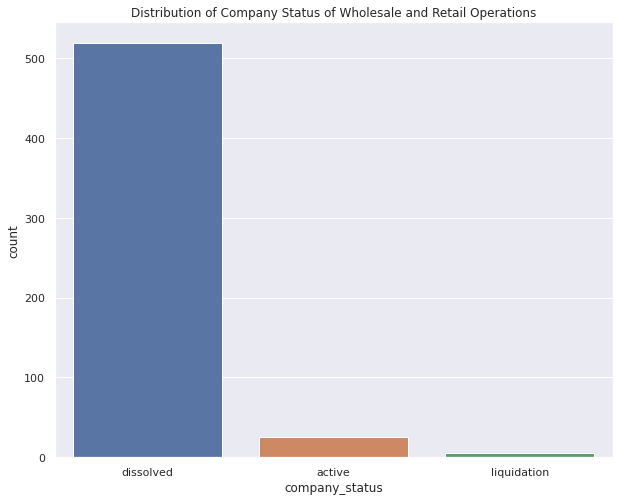

In [32]:
# Plotting the company status distributions
count_plot(wholesale_companies_df, "company_status", "Distribution of Company Status of Wholesale and Retail Operations")
wholesale_companies_df['company_status'].value_counts()

In [33]:
# Calculating the percentage of firms against three company status
wholesale_companies_df['company_status'].value_counts()/len(wholesale_companies_df)

dissolved     0.9436
active        0.0455
liquidation   0.0109
Name: company_status, dtype: float64

✴️ **Observations:** 

* A significant `94.36%` of wholesale and retail firms are in `dissolved` state
* A minute fraction of `5.64%` firms are in `active or liquidiation` status
* A thorough investigation on time of cessation vs time of creation, active period is required to develop an improved understanding of the scope (if any) of this sector

## 4.4 Geospatial Analysis<a id='GSP1'></a>

⚠️ **Note:** The below program code takes a long time to run. Therefore, leveraging a dataset to convert postal codes into respective latitudes and longitudes is more time efficient for this limited dataset. This method has been employed to replace below code logic ⚠️

❗**Reference:** [UK Postal Code Latitude Longitude Dataset 2017](https://github.com/dwyl/uk-postcodes-latitude-longitude-complete-csv)

In [34]:
#!pip install geocoder
#pip install geopy
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(timeout=10, user_agent="PDS")
#
#def geo_coding(df):
#    df['geocode'] = df['postal_code'].apply(geolocator.geocode)
#    df['latitude'] = [g.latitude for g in df.geocode]
#    df['longitude'] = [g.longitude for g in df.geocode]
#    return df
#
#geo_coded_wholesale_companies_df = geo_coding(wholesale_companies_df)
#geo_coded_wholesale_companies_df.to_csv('geocoded_df.csv')

⚠️ **Note:** The dataset for this conversion was a huge file (**~90 MB**) and therefore could not be placed in guthub directly. `Github LFS` (<u>Large File Storage</u>) was used to locally export the huge csv file to github's server ⚠️

In [35]:
# Reading the UK Postal Codes and Latitude and Longitude csv file
postal_code_df = pd.read_csv('https://media.githubusercontent.com/media/Clarin19/companies-house-api/main/ukpostcodes.csv')

In [36]:
# Dropping redundant labels and renaming postcode column to postal_code in order to merge the datafrmaes in following steps
drop_redundant_columns(postal_code_df, "id")
postal_code_df.rename(columns={"postcode": "postal_code"}, inplace = True)

In [37]:
# Merging the datasets to retrieve the latitude and longitude information
wholesale_companies_df = merge_dataframes(wholesale_companies_df, postal_code_df, 'inner', 'postal_code', False, False)
wholesale_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc,year_of_creation,year_of_cessation,month_of_creation,month_of_cessation,id,latitude,longitude
0,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,Retail sale of watches and jewellery in specia...,2011,2016,10,8,917671,52.4525,-1.2036
1,GEDIGITAL LIMITED,07803579,dissolved,ltd,2014-10-21,2011-10-10,47430,SE28 8PG,Retail sale of audio and video equipment in sp...,2011,2014,10,10,382630,51.5097,0.1309
2,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores,2011,2018,10,3,1027347,51.5820,0.0453
3,BLUE WIZARD VALETING LIMITED,07802262,dissolved,ltd,2016-08-16,2011-10-07,45200,IP20 9LF,Maintenance and repair of motor vehicles,2011,2016,10,8,1016270,52.3866,1.2714
4,ASHWOOD TRADING LIMITED,07802265,dissolved,ltd,2016-10-04,2011-10-07,47650,N12 0DR,Retail sale of games and toys in specialised s...,2011,2016,10,10,771603,51.6109,-0.1783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,VOKES AND BECK LTD,07855564,dissolved,ltd,2015-11-03,2011-11-21,46130,SO53 2DX,Agents involved in the sale of timber and buil...,2011,2015,11,11,302258,50.9965,-1.3629
537,THE NATURAL REVOLUTION LTD,07855581,dissolved,ltd,2016-09-06,2011-11-21,47990,WR12 7JB,"Other retail sale not in stores, stalls or mar...",2011,2016,11,9,45767,52.0440,-1.9336
538,CASTLEBURY LIMITED,07856672,dissolved,ltd,2016-03-29,2011-11-22,46130;46900,S65 2UE,Agents involved in the sale of timber and buil...,2011,2016,11,3,432098,53.4393,-1.3264
539,MUMS WAY LIMITED,07856700,dissolved,ltd,2015-12-08,2011-11-22,47990,NW8 0DQ,"Other retail sale not in stores, stalls or mar...",2011,2015,11,12,632323,51.5407,-0.1795


⚠️ **Note:** Proceeding analysis with `541` matched wholesale operation firms ⚠️

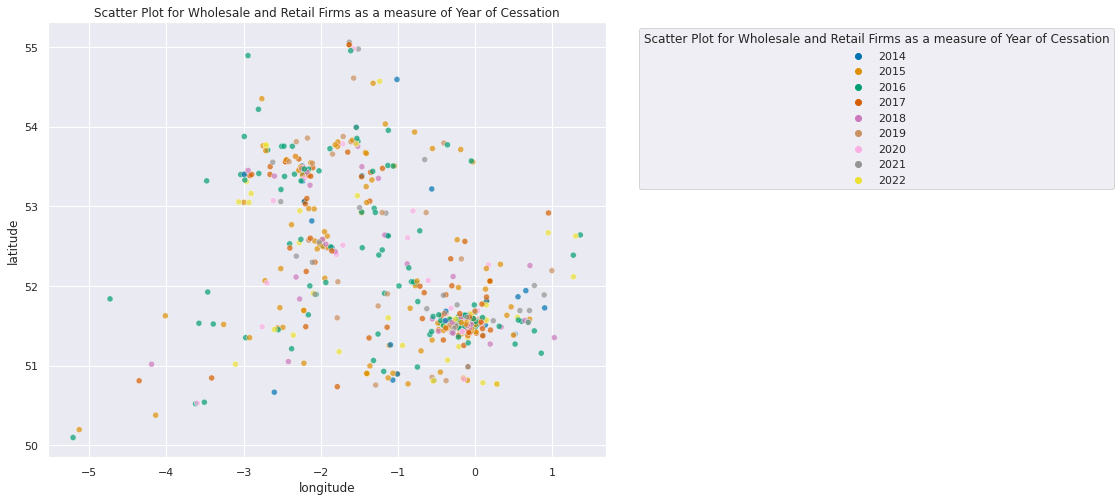

In [38]:
# Plotting the firm locations using scatter plot
scat_plot(wholesale_companies_df, 'longitude', 'latitude', 'year_of_cessation','Scatter Plot for Wholesale and Retail Firms as a measure of Year of Cessation')

✴️ **Observations:** 

* A majority of wholesale and retail operations are conducted in areas surrounding `London` and `Manchester`
* A significant amount of firms in these prominent locations have been `active for a minimum of five years`, implying `better prospects` of conducting business in mentioned industry hubs

In [39]:
# Only considering firms which have not ended within a five-year range
wholesale_companies_subset_df = wholesale_companies_df[wholesale_companies_df.year_of_cessation > 2016]
wholesale_companies_subset_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc,year_of_creation,year_of_cessation,month_of_creation,month_of_cessation,id,latitude,longitude
2,MUM CARES LTD,07803674,dissolved,ltd,2018-03-20,2011-10-10,47710,IG4 5PG,Retail sale of clothing in specialised stores,2011,2018,10,3,1027347,51.5820,0.0453
5,TRI T SCRUB LIMITED,07854506,dissolved,ltd,2018-12-04,2011-11-21,46420,N12 0DR,Wholesale of clothing and footwear,2011,2018,11,12,771603,51.6109,-0.1783
6,JULIAN MILLS LIMITED,07803737,dissolved,ltd,2018-10-23,2011-10-10,47990;62020,WR14 2AW,"Other retail sale not in stores, stalls or mar...",2011,2018,10,10,44961,52.1122,-2.3197
8,AFRESH ENERGY LIMITED,07803923,dissolved,ltd,2017-06-27,2011-10-10,46900,LU2 9SF,Non-specialised wholesale trade,2011,2017,10,6,851380,51.8895,-0.3796
12,ARTERIA (UK) LTD,07804449,dissolved,ltd,2020-01-21,2011-10-10,46900,NW8 8UE,Non-specialised wholesale trade,2011,2020,10,1,631422,51.5269,-0.1736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,LISA'S PROMOTIONS LTD,07854952,dissolved,ltd,2017-04-18,2011-11-21,47750,CM23 4EP,Retail sale of cosmetic and toilet articles in...,2011,2017,11,4,1429944,51.8611,0.1469
528,BUSINESS GOLD LTD.,07856476,dissolved,ltd,2018-01-16,2011-11-22,46760,SE1 0BL,Wholesale of other intermediate products,2011,2018,11,1,397712,51.5030,-0.1017
530,GIA UK VENDING LIMITED,07854866,dissolved,ltd,2018-01-16,2011-11-21,47190,S74 0DQ,Other retail sale in non-specialised stores,2011,2018,11,1,426157,53.4977,-1.4665
531,SAKTHY.S LIMITED,07855069,dissolved,ltd,2017-01-17,2011-11-21,47110,EN5 5TZ,Retail sale in non-specialised stores with foo...,2011,2017,11,1,1204877,51.6533,-0.1989


In [40]:
# Displaying distribution of firm locations active for at least five-years on the map using folium:
print('Distribution of Wholesale and Retail firms with a minimum of five-year lifespan in the United Kingdom')
folium_map(wholesale_companies_subset_df, 'longitude', 'latitude')

Distribution of Wholesale and Retail firms with a minimum of five-year lifespan in the United Kingdom


✴️ **Observations:** 

* The most prominent area for wholesale and retail operations and activies is `London`, which is the `business hub of Europe`, with relevant links and `exposure` to the industry world and market
* This is followed by industry populous areas such as `Manchester`, `Birmingham` and `Brighton`, where `cost of operations` is significantly `low` compared to that of London

## 4.5 Time Series Analysis<a id='TS1'></a>

In [41]:
# Analysing the general active duration for firms in Wholesale and Retail industry
wholesale_companies_df['active_period'] = wholesale_companies_df['year_of_cessation'] - wholesale_companies_df['year_of_creation']
wholesale_companies_df['active_period'].describe()

count   541.0000
mean      6.2588
std       2.3277
min       3.0000
25%       4.0000
50%       6.0000
75%       8.0000
max      11.0000
Name: active_period, dtype: float64

In [42]:
# Calculating the lifespan of wholesale operations in percentage
wholesale_companies_df['active_period'].value_counts()/len(wholesale_companies_df)

5    0.2274
4    0.2163
6    0.1386
7    0.0943
11   0.0795
8    0.0721
10   0.0665
9    0.0555
3    0.0499
Name: active_period, dtype: float64

5     123
4     117
6      75
7      51
11     43
8      39
10     36
9      30
3      27
Name: active_period, dtype: int64

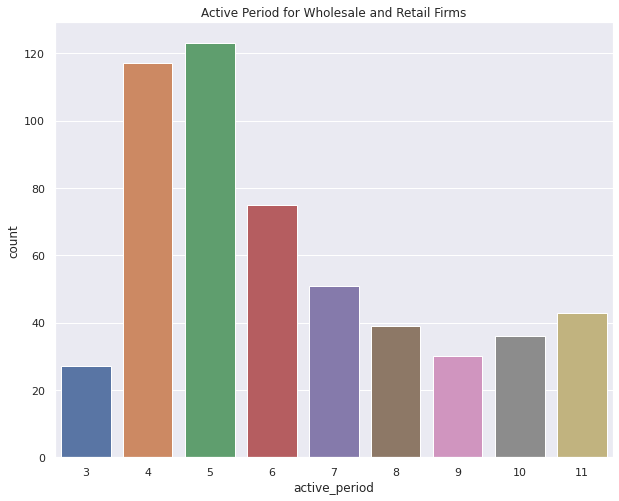

In [43]:
# Plotting the distribution of active period for wholesale and retail firms observed
count_plot(wholesale_companies_df,'active_period','Active Period for Wholesale and Retail Firms')
wholesale_companies_df['active_period'].value_counts()

✴️ **Observations:** 

* Most of the observed wholesale and retail operations (`58.23%`) remain active for a duration of `4-6 years` (lifespan)
* 27 of observed operations (`4.99%`) in this sector had a minimum lifespan of `3 years`
* 43 of observed operations (`7.95%`) which started in 2011, continue to operate, for an impressive `11 years` (as of 2022)

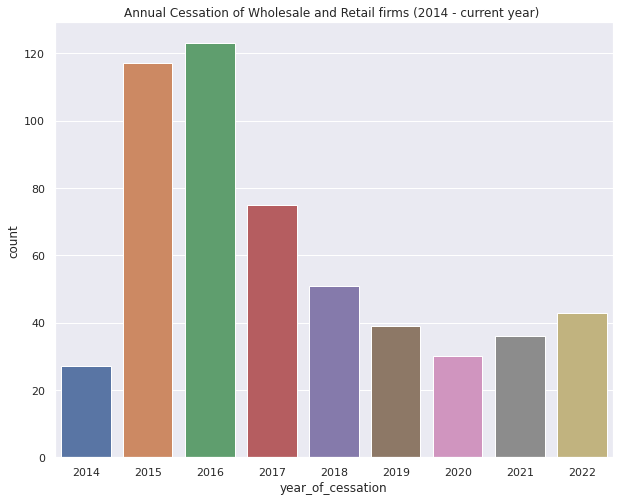

In [44]:
# Plotting annual cessation of wholesale and retail firms
count_plot(wholesale_companies_df,"year_of_cessation", "Annual Cessation of Wholesale and Retail firms (2014 - current year) ")

✴️ **Observations:** 

* The wholesale and retail operations being observed were all created in 2011
* A lot of firms were closed in the years `2015` and `2016`
* This was followed by a steep decline in the cessation of wholesale operations in the following years, posing a `potential scope` for longevity and continued growth in this sector

⚠️ **Note:** Further analysing on the crucial months leading to cessation of firms, in `2015` and `2016` with <u>high cessation rates</u>, followed up by a <u>recent trend analysis</u>, `2021`.⚠️

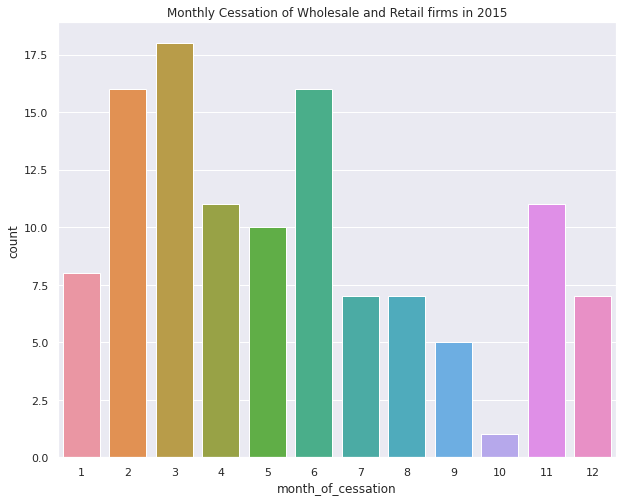

In [45]:
# PLotting wholesale and retail firms which underwent cessation in 2015
wholesale_companies_subset_2015_df = wholesale_companies_df[wholesale_companies_df.year_of_cessation == 2015]
count_plot(wholesale_companies_subset_2015_df,"month_of_cessation", "Monthly Cessation of Wholesale and Retail firms in 2015")

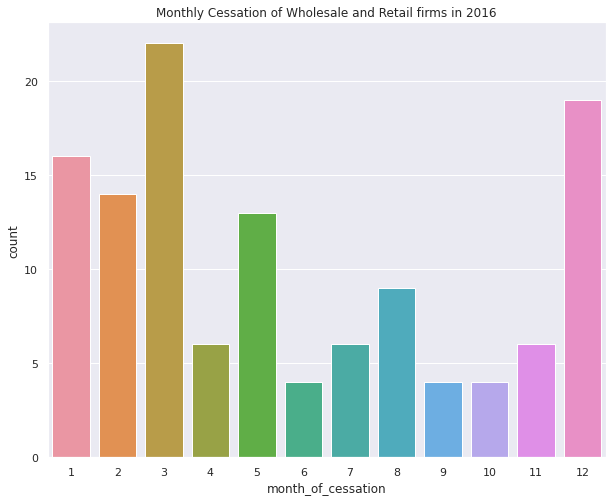

In [46]:
# PLotting wholesale and retail firms which underwent cessation in 2016
wholesale_companies_subset_2016_df = wholesale_companies_df[wholesale_companies_df.year_of_cessation == 2016]
count_plot(wholesale_companies_subset_2016_df,"month_of_cessation", "Monthly Cessation of Wholesale and Retail firms in 2016")

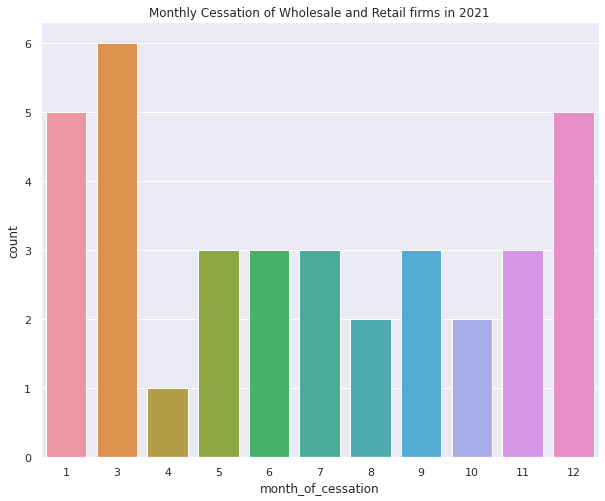

In [47]:
# PLotting wholesale and retail firms which underwent cessation in 2021
wholesale_companies_subset_2021_df = wholesale_companies_df[wholesale_companies_df.year_of_cessation == 2021]
count_plot(wholesale_companies_subset_2021_df,"month_of_cessation", "Monthly Cessation of Wholesale and Retail firms in 2021")

✴️ **Observations:** 

* Following patterns of high wholesale and retail cessation, and comparing the same with a recent annual trend, a `significant amount of operations` is observed to `end in first quarter of the year`
* The subsequent months show a decline in the rate of cessation of operations
* There is a stark increase in cessation in December
* In `recent years`, the `number of operations in this sector suffering cessation` has drastically `reduced by about 50-70%` (observe y-scale of the graphs)
* The `prime months` when wholesale and retail firms generally have their operations and `activities disrupted` are `January`, `February`, `March` and `December`

## 4.6 Mini Report<a id='MR1'></a>

<i><u>Word Count: 248 words</u></i>

The government of United Kingdom is interested to financially support new operations in the wholesale and retail sector since they cater to a significant section of the job market. Prior to investing, they wish to receive recommendation insights on prime location for launching a new operation, generic lifespan and scope of wholesale and retail firms.

Companies House API data was extracted and filtered based on their SIC (Standard Industrial Classification) codes to yield `541` usable observational company data. Several pre-processing steps to convert semi-structured JSON into flat tables, handle null and extreme values were performed. It was observed that `94.36%` of firms were `dissolved` with a mere `5.64%` of firms in `active` or `liquidation`. To understand generic lifespan of firms, active period was computed, which revealed that `58.23%` of wholesale and retail firms operated for a duration of `4-6` years and a mere `7.95%` of total firms operated for at least `11` years, expressing **less likelihood of longevity of operational units in this sector**. The cessation of firms has decreased over the years by about `50-70%`, with the first quarter of the year continuing to be the prime time for disruption in this sector.

Converting postal codes into geographical coordinates depicted most firms with a minimum lifespan of five years, were based off the business hub of Europe, `London`, with **relevant links and exposure to national and international industries**, followed by prominent areas such as `Manchester`, `Birmingham` and `Brighton`, where **cost of operations is less compared to London**.

### **Visualisations as part of mini report**

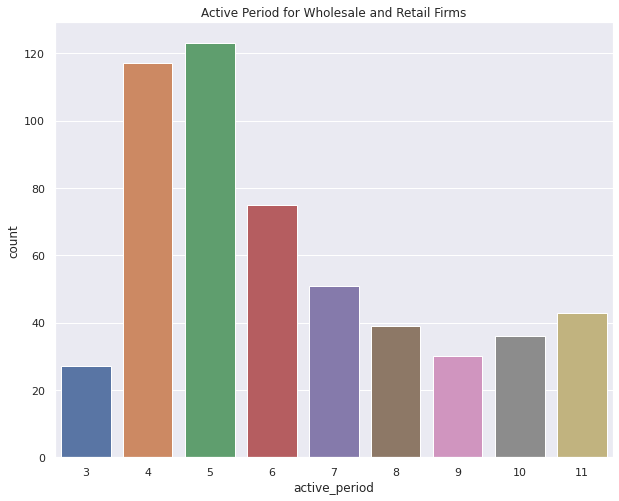

In [48]:
# PART-OF-MINI-REPORT FIGURE 1: Box Plot Distribution of Active Period for Wholesale and Retail firms in the United Kingdom
count_plot(wholesale_companies_df,'active_period','Active Period for Wholesale and Retail Firms')

In [49]:
# PART-OF-MINI-REPORT FIGURE 2: Folium Map Plot of Wholesale and Retail firms in the United Kingdom
print('Distribution of Wholesale and Retail firms with a minimum of five-year lifespan in the United Kingdom')
folium_map(wholesale_companies_subset_df, 'longitude', 'latitude')

Distribution of Wholesale and Retail firms with a minimum of five-year lifespan in the United Kingdom


# Section 5. Business Question: Equal Opportunity in Transportation and Storage<a id='BQ2'></a>

## 5.1 Business Context<a id='BC2'></a>

According to a blog released by [CNBC](https://www.cnbc.com/2022/03/30/these-5-industries-have-the-biggest-gender-pay-gapsheres-why-.html) in March 2022, **Transportation and Warehousing** is one of the industries with an evident gender pay gap, an appalling **87 cents paid to a woman** professional for every **1 dollar a male** professional earns. This has alarmed the government of United Kingdom to evaluate equal opportunities within the transportation and warehousing sector, to ensure no workplace discrimination is occurring in terms of age, gender and culture.

UOE Consulting Pvt. Ltd. has been supplied with raw Companies House and Important Stakeholder API data of about **5000 companies** from various sectors. Technical pre-processing is required to extract data relevant to transportation and warehousing companies, and a deep analysis on workforce distribution to ensure equal opportunities for all, which is a major concern for the government. The government seeks insights on current stakeholder statistics on the below three diversity metrics:

*	Age: Uniform distribution of stakeholders of varied age groups
*	Gender: Equal opportunities for professionals of all gender groups
*	Culture: Prominent stakeholder positions occupied by diverse cultural professionals

## 5.2 Data Collection<a id='data2'></a>

In [50]:
# Dropping columns not necessary for current analysis
transport_companies_df = companies_df.drop(['kind', 'company_subtype', 'company_profile', 'address_line_1', 'address_line_2', 'region', 'country', 'locality'], axis=1, inplace=False)
transport_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,2016-01-19,2011-10-10,96090,NaN
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,2016-02-16,2011-10-10,81210;81299,SW8 4AG
2,LA EDRA LIMITED,07803626,dissolved,ltd,2017-10-17,2011-10-10,99999,SW1Y 5EA
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,2021-04-06,2011-10-10,99999,SK10 4AW
...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,2016-04-19,2011-11-22,62012,LE3 3AJ
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,2015-11-10,2011-11-22,45112,YO30 1AL
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,2020-10-13,2011-11-22,62020,HP1 1FW
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,2021-10-26,2011-11-22,66210,CT6 5NP


In [51]:
# Creating a blank copy of dataframe to later add only transportation and storage related sic_codes information
sic_code_transport_storage_df = sic_codes_df.loc[np.repeat(False, sic_codes_df.shape[0])].copy()
sic_code_transport_storage_df

,sic_codes,Description


⚠️ **Note:** [Section H: Transportation and storage](https://resources.companieshouse.gov.uk/sic/) contains `33 sic_codes` which have been shortlisted with below range ⚠️

In [52]:
# Creating a dataframe for sic_codes related to transportation and storage sector
sic_code_transport_storage_df = sic_codes_df[sic_codes_df['sic_codes'].between(49100, 53202)]
sic_code_transport_storage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 460 to 492
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sic_codes    33 non-null     int64 
 1   Description  33 non-null     object
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


In [53]:
# Converting the shortlisted dataframe of transportation and storage industry into a dictionary
dic = sic_code_transport_storage_df.astype(str).set_index('sic_codes')['Description'].to_dict()

# Merging the description associated with sic_codes only for relevant columns and leaving the remaining entries blank
transport_companies_df['sic_desc'] = (transport_companies_df['sic_codes'].str.replace('\d+', lambda m: dic.get(m.group(), ''),regex=True))
transport_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc
0,INDIANOS RESTAURANT LIMITED,07803460,dissolved,ltd,2016-01-19,2011-10-10,96090,NaN,
1,ZHELEV (UK) LIMITED,07803574,dissolved,ltd,2016-02-16,2011-10-10,81210;81299,SW8 4AG,;
2,LA EDRA LIMITED,07803626,dissolved,ltd,2017-10-17,2011-10-10,99999,SW1Y 5EA,
3,SARAH MAY JEWELLERY LIMITED,07803673,dissolved,ltd,2016-08-18,2011-10-10,47770,LE17 4DD,
4,VILLA NO. 1 LA MANGA LTD.,07803687,dissolved,ltd,2021-04-06,2011-10-10,99999,SK10 4AW,
...,...,...,...,...,...,...,...,...,...
4995,NANAGRAM WEBSITES AND HOSTING LIMITED,07856811,dissolved,ltd,2016-04-19,2011-11-22,62012,LE3 3AJ,
4996,PLASKITT & CAINE LTD,07856812,dissolved,ltd,2015-11-10,2011-11-22,45112,YO30 1AL,
4997,LGM CHANGE MANAGEMENT LTD,07856817,dissolved,ltd,2020-10-13,2011-11-22,62020,HP1 1FW,
4998,BUTLER LOSS ADJUSTERS LTD,07856818,dissolved,ltd,2021-10-26,2011-11-22,66210,CT6 5NP,


⚠️ **Note:** Column `sic_desc` needs pre processing to <u>remove the semi colon</u> separator so null values can be detected and the entries with null values post sic code mapping process can be removed ⚠️

In [54]:
# Replacing the semi colon separator when multiple sic codes converted to values 
transport_companies_df['sic_desc'] =  transport_companies_df['sic_desc'].apply(lambda x: x.replace(";",'').replace(";",''))

# Dropping entries where sic_desc is null or nan since it is not relevant to the chosen business case
transport_companies_df.drop(transport_companies_df[transport_companies_df.sic_desc == ''].index, axis = 0, inplace = True) # null values removed
transport_companies_df.drop(transport_companies_df[transport_companies_df.sic_desc == 'nan'].index, axis = 0, inplace = True) # string nan retained during conversion removed
transport_companies_df

,company_name,company_number,company_status,company_type,date_of_cessation,date_of_creation,sic_codes,postal_code,sic_desc
6,JWT COMMERCIAL LTD,07803885,administration,ltd,NaN,2011-10-10,49410,M2 1EW,Freight transport by road
22,MP'S COURIERS LTD,07804003,dissolved,ltd,2015-03-03,2011-10-10,53201,LS7 2EA,Licensed carriers
119,A&C DRIVE LIMITED,07805486,dissolved,ltd,2021-01-12,2011-10-11,49410,RM10 8HU,Freight transport by road
142,ROC TRANS LTD,07803098,dissolved,ltd,2015-05-19,2011-10-10,49410,PE11 1BP,Freight transport by road
164,MARK'S TRANSPORT LIMITED,07805792,dissolved,ltd,2018-05-01,2011-10-11,49410,TW17 8AS,Freight transport by road
...,...,...,...,...,...,...,...,...,...
4671,AMBUTRX LIMITED,07852741,dissolved,ltd,2015-03-10,2011-11-18,49320,BH17 7BX,Taxi operation
4717,IPS DRIVING SERVICES LIMITED,07853990,dissolved,ltd,2014-10-21,2011-11-21,49410,TW17 8AS,Freight transport by road
4726,A S WHITE TRANSPORT LIMITED,07853083,dissolved,ltd,2017-08-15,2011-11-18,49410,TW17 8AS,Freight transport by road
4793,R J BAXTER HAULAGE LTD,07855947,dissolved,ltd,2015-03-17,2011-11-22,49410,IP1 4JJ,Freight transport by road


⚠️ **Note:** `146 entries` relevant to chosen business case have been returned and further analysis will be carried on the selected entries ⚠️

In [55]:
# Creating a list of company numbers
transport_company_numbers = transport_companies_df['company_number'].tolist()
len(transport_company_numbers)

146

⚠️ **Note:** `146 company_numbers` are saved in a list. Iterating through relevant 146 company numbers to retrieve significant stakeholders for each (if any) and saving this data in a raw data list which will then be converted to a dataframe and saved as the primary dataframe for further analysis ⚠️

In [56]:
# Saving the raw unformatted data for each company number into a temporary list
transport_people_raw_data = []
for comp_number in transport_company_numbers:
    transport_people_raw_data.append((all_persons_in_company(comp_number)))
    
# Observing the format of the unformatted temporary list
transport_people_raw_data[0]

[{'name_elements': {'middle_name': 'Michael',
   'surname': 'Whiteley',
   'title': 'Mr',
   'forename': 'Jonathan'},
  'links': {'self': '/company/07803885/persons-with-significant-control/individual/Lx5ErRsnea7EU2ZfACA5WQQ8rjA'},
  'natures_of_control': ['ownership-of-shares-25-to-50-percent',
   'voting-rights-25-to-50-percent'],
  'nationality': 'English',
  'name': 'Mr Jonathan Michael Whiteley',
  'kind': 'individual-person-with-significant-control',
  'address': {'region': 'Merseyside',
   'postal_code': 'L20 6HX',
   'address_line_1': 'Orrell Lane',
   'address_line_2': 'Bootle',
   'locality': 'Liverpool',
   'premises': 'Jwt Commercial Ltd, Trinity Business Park',
   'country': 'England'},
  'etag': '0ec2e678552f079b72a2c9269a7c9f5824f492a8',
  'country_of_residence': 'England',
  'notified_on': '2020-12-18',
  'date_of_birth': {'month': 10, 'year': 1972}}]

In [57]:
# Creating an empty dataframe with the target dataframe structure (defining target columns)
col = ['name_elements', 'links', 'natures_of_control', 'nationality', 'name', 'kind', 'address', 'country_of_residence', 'notified_on', 'date_of_birth', 'etag']
transport_people_df = pd.DataFrame(columns=col)
transport_people_df

,name_elements,links,natures_of_control,nationality,name,kind,address,country_of_residence,notified_on,date_of_birth,etag


In [58]:
# Looping through the 146 companies to covert each company people raw data from list to a dataframe and append to primary dataframe to be used for further analysis
for i in range(len(transport_company_numbers)):
    transport_people_df = transport_people_df.append(pd.DataFrame(transport_people_raw_data[i], columns=col))
len(transport_people_df)

71

⚠️ **Note:** `71 significant people` corresponding to the 146 transport and storage companies are extracted. ⚠️

In [59]:
# Dropping columns not relevant to current analysis
transport_people_df = drop_redundant_columns(transport_people_df, 'etag')
transport_people_df = drop_redundant_columns(transport_people_df, 'address')
transport_people_df

,name_elements,links,natures_of_control,nationality,name,kind,country_of_residence,notified_on,date_of_birth
0,"{'middle_name': 'Michael', 'surname': 'Whitele...",{'self': '/company/07803885/persons-with-signi...,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,"{'month': 10, 'year': 1972}"
0,"{'title': 'Mr', 'forename': 'Catalin', 'surnam...",{'self': '/company/07805486/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,"{'year': 1984, 'month': 5}"
0,"{'surname': 'Duerden', 'forename': 'Darren', '...",{'self': '/company/07806212/persons-with-signi...,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,"{'year': 1966, 'month': 7}"
0,"{'title': 'Mr', 'middle_name': 'James', 'surna...",{'self': '/company/07807395/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,"{'year': 1958, 'month': 12}"
0,"{'title': 'Mr', 'surname': 'Johns', 'forename'...",{'self': '/company/07808287/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,"{'year': 1970, 'month': 1}"
0,"{'title': 'Mr', 'forename': 'Ian', 'middle_nam...",{'self': '/company/07809234/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,"{'year': 1959, 'month': 11}"
0,"{'forename': 'Andras', 'title': 'Mr', 'surname...",{'self': '/company/07809501/persons-with-signi...,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,"{'month': 12, 'year': 1978}"
0,"{'forename': 'Elena', 'middle_name': 'Roxana',...",{'self': '/company/07810055/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,"{'month': 11, 'year': 1981}"
0,"{'forename': 'Andrew', 'surname': 'Pearse', 't...",{'self': '/company/07809776/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,"{'year': 1968, 'month': 2}"
0,"{'forename': 'Paul', 'title': 'Mr', 'surname':...",{'self': '/company/07809945/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,"{'year': 1974, 'month': 4}"


⚠️ **Note:** It is observed that the `index` <u>needs to be reset</u> in order to perform further pre process steps accurately ⚠️

In [60]:
# Resetting index for further pre process to take place
transport_people_df.reset_index(inplace = True)
transport_people_df

,index,name_elements,links,natures_of_control,nationality,name,kind,country_of_residence,notified_on,date_of_birth
0,0,"{'middle_name': 'Michael', 'surname': 'Whitele...",{'self': '/company/07803885/persons-with-signi...,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,"{'month': 10, 'year': 1972}"
1,0,"{'title': 'Mr', 'forename': 'Catalin', 'surnam...",{'self': '/company/07805486/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,"{'year': 1984, 'month': 5}"
2,0,"{'surname': 'Duerden', 'forename': 'Darren', '...",{'self': '/company/07806212/persons-with-signi...,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,"{'year': 1966, 'month': 7}"
3,0,"{'title': 'Mr', 'middle_name': 'James', 'surna...",{'self': '/company/07807395/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,"{'year': 1958, 'month': 12}"
4,0,"{'title': 'Mr', 'surname': 'Johns', 'forename'...",{'self': '/company/07808287/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,"{'year': 1970, 'month': 1}"
5,0,"{'title': 'Mr', 'forename': 'Ian', 'middle_nam...",{'self': '/company/07809234/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,"{'year': 1959, 'month': 11}"
6,0,"{'forename': 'Andras', 'title': 'Mr', 'surname...",{'self': '/company/07809501/persons-with-signi...,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,"{'month': 12, 'year': 1978}"
7,0,"{'forename': 'Elena', 'middle_name': 'Roxana',...",{'self': '/company/07810055/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,"{'month': 11, 'year': 1981}"
8,0,"{'forename': 'Andrew', 'surname': 'Pearse', 't...",{'self': '/company/07809776/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,"{'year': 1968, 'month': 2}"
9,0,"{'forename': 'Paul', 'title': 'Mr', 'surname':...",{'self': '/company/07809945/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,"{'year': 1974, 'month': 4}"


In [61]:
# Dropping incorrect index from dataframe
transport_people_df = drop_redundant_columns(transport_people_df, 'index')
transport_people_df

,name_elements,links,natures_of_control,nationality,name,kind,country_of_residence,notified_on,date_of_birth
0,"{'middle_name': 'Michael', 'surname': 'Whitele...",{'self': '/company/07803885/persons-with-signi...,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,"{'month': 10, 'year': 1972}"
1,"{'title': 'Mr', 'forename': 'Catalin', 'surnam...",{'self': '/company/07805486/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,"{'year': 1984, 'month': 5}"
2,"{'surname': 'Duerden', 'forename': 'Darren', '...",{'self': '/company/07806212/persons-with-signi...,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,"{'year': 1966, 'month': 7}"
3,"{'title': 'Mr', 'middle_name': 'James', 'surna...",{'self': '/company/07807395/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,"{'year': 1958, 'month': 12}"
4,"{'title': 'Mr', 'surname': 'Johns', 'forename'...",{'self': '/company/07808287/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,"{'year': 1970, 'month': 1}"
5,"{'title': 'Mr', 'forename': 'Ian', 'middle_nam...",{'self': '/company/07809234/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,"{'year': 1959, 'month': 11}"
6,"{'forename': 'Andras', 'title': 'Mr', 'surname...",{'self': '/company/07809501/persons-with-signi...,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,"{'month': 12, 'year': 1978}"
7,"{'forename': 'Elena', 'middle_name': 'Roxana',...",{'self': '/company/07810055/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,"{'month': 11, 'year': 1981}"
8,"{'forename': 'Andrew', 'surname': 'Pearse', 't...",{'self': '/company/07809776/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,"{'year': 1968, 'month': 2}"
9,"{'forename': 'Paul', 'title': 'Mr', 'surname':...",{'self': '/company/07809945/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,"{'year': 1974, 'month': 4}"


⚠️ **Note:** Columns `name_elements`, `links` and `date_of_birth` are in <u>semi-structured JSON format</u> which must be <u>converted into flat tables</u> to proceed further ⚠️

In [62]:
# Converting semi-structured JSON format columns into regular format
transport_people_df = json_normalize_function(transport_people_df,'name_elements')
transport_people_df = json_normalize_function(transport_people_df,'links')
transport_people_df = json_normalize_function(transport_people_df,'date_of_birth')

transport_people_df

,name_elements,links,natures_of_control,nationality,name,kind,country_of_residence,notified_on,date_of_birth,middle_name,surname,title,forename,self,month,year
0,"{'middle_name': 'Michael', 'surname': 'Whitele...",{'self': '/company/07803885/persons-with-signi...,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,"{'month': 10, 'year': 1972}",Michael,Whiteley,Mr,Jonathan,/company/07803885/persons-with-significant-con...,10,1972
1,"{'title': 'Mr', 'forename': 'Catalin', 'surnam...",{'self': '/company/07805486/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,"{'year': 1984, 'month': 5}",NaN,Nastase,Mr,Catalin,/company/07805486/persons-with-significant-con...,5,1984
2,"{'surname': 'Duerden', 'forename': 'Darren', '...",{'self': '/company/07806212/persons-with-signi...,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,"{'year': 1966, 'month': 7}",NaN,Duerden,Mr,Darren,/company/07806212/persons-with-significant-con...,7,1966
3,"{'title': 'Mr', 'middle_name': 'James', 'surna...",{'self': '/company/07807395/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,"{'year': 1958, 'month': 12}",James,Akers,Mr,Stephen,/company/07807395/persons-with-significant-con...,12,1958
4,"{'title': 'Mr', 'surname': 'Johns', 'forename'...",{'self': '/company/07808287/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,"{'year': 1970, 'month': 1}",NaN,Johns,Mr,Ian,/company/07808287/persons-with-significant-con...,1,1970
5,"{'title': 'Mr', 'forename': 'Ian', 'middle_nam...",{'self': '/company/07809234/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,"{'year': 1959, 'month': 11}",Michael,Ray,Mr,Ian,/company/07809234/persons-with-significant-con...,11,1959
6,"{'forename': 'Andras', 'title': 'Mr', 'surname...",{'self': '/company/07809501/persons-with-signi...,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,"{'month': 12, 'year': 1978}",NaN,Lantos,Mr,Andras,/company/07809501/persons-with-significant-con...,12,1978
7,"{'forename': 'Elena', 'middle_name': 'Roxana',...",{'self': '/company/07810055/persons-with-signi...,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,"{'month': 11, 'year': 1981}",Roxana,Stoica,Ms,Elena,/company/07810055/persons-with-significant-con...,11,1981
8,"{'forename': 'Andrew', 'surname': 'Pearse', 't...",{'self': '/company/07809776/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,"{'year': 1968, 'month': 2}",NaN,Pearse,Mr,Andrew,/company/07809776/persons-with-significant-con...,2,1968
9,"{'forename': 'Paul', 'title': 'Mr', 'surname':...",{'self': '/company/07809945/persons-with-signi...,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,"{'year': 1974, 'month': 4}",NaN,Holt,Mr,Paul,/company/07809945/persons-with-significant-con...,4,1974


⚠️ **Note:** The redundant `semi-structured JSON` columns can now be dropped since they have been converted into flat tables ⚠️

In [63]:
# Dropping redundant columns which are not relevant for current analysis
transport_people_df = transport_people_df.drop(['name_elements', 'links', 'date_of_birth', 'middle_name', 'surname', 'forename', 'month'], axis=1, inplace=False)
transport_people_df

,natures_of_control,nationality,name,kind,country_of_residence,notified_on,title,self,year
0,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,Mr,/company/07803885/persons-with-significant-con...,1972
1,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,Mr,/company/07805486/persons-with-significant-con...,1984
2,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07806212/persons-with-significant-con...,1966
3,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,Mr,/company/07807395/persons-with-significant-con...,1958
4,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07808287/persons-with-significant-con...,1970
5,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07809234/persons-with-significant-con...,1959
6,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,Mr,/company/07809501/persons-with-significant-con...,1978
7,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,Ms,/company/07810055/persons-with-significant-con...,1981
8,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07809776/persons-with-significant-con...,1968
9,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,Mr,/company/07809945/persons-with-significant-con...,1974


⚠️ **Note:** Columns <u>gender and age should be defined</u> so that these columns, along with nationality (already defined) can be analysed in coming sections ⚠️

In [64]:
# Creating a dictionary for gender identification
gender_dic = {"Mr": "M", "Miss": "F", "Mrs": "F", "Ms": "F"}

# Generating the gender column based on title mapping with dictionary defined above
transport_people_df['gender'] = transport_people_df['title'].map(gender_dic)
transport_people_df

,natures_of_control,nationality,name,kind,country_of_residence,notified_on,title,self,year,gender
0,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,Mr,/company/07803885/persons-with-significant-con...,1972,M
1,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,Mr,/company/07805486/persons-with-significant-con...,1984,M
2,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07806212/persons-with-significant-con...,1966,M
3,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,Mr,/company/07807395/persons-with-significant-con...,1958,M
4,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07808287/persons-with-significant-con...,1970,M
5,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07809234/persons-with-significant-con...,1959,M
6,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,Mr,/company/07809501/persons-with-significant-con...,1978,M
7,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,Ms,/company/07810055/persons-with-significant-con...,1981,F
8,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07809776/persons-with-significant-con...,1968,M
9,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,Mr,/company/07809945/persons-with-significant-con...,1974,M


In [65]:
# Calculating current year
today = datetime.now()
current_year = today.year

# Generating the age of stakeholder by calculating current_year - year(DOB)
transport_people_df['age'] = current_year - transport_people_df['year']
transport_people_df

,natures_of_control,nationality,name,kind,country_of_residence,notified_on,title,self,year,gender,age
0,"[ownership-of-shares-25-to-50-percent, voting-...",English,Mr Jonathan Michael Whiteley,individual-person-with-significant-control,England,2020-12-18,Mr,/company/07803885/persons-with-significant-con...,1972,M,50
1,[ownership-of-shares-75-to-100-percent],Romanian,Mr Catalin Nastase,individual-person-with-significant-control,England,2016-10-01,Mr,/company/07805486/persons-with-significant-con...,1984,M,38
2,[ownership-of-shares-75-to-100-percent],English,Mr Darren Duerden,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07806212/persons-with-significant-con...,1966,M,56
3,[ownership-of-shares-75-to-100-percent],British,Mr Stephen James Akers,individual-person-with-significant-control,United Kingdom,2016-10-01,Mr,/company/07807395/persons-with-significant-con...,1958,M,64
4,[ownership-of-shares-75-to-100-percent],British,Mr Ian Johns,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07808287/persons-with-significant-con...,1970,M,52
5,[ownership-of-shares-75-to-100-percent],British,Mr Ian Michael Ray,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07809234/persons-with-significant-con...,1959,M,63
6,"[ownership-of-shares-75-to-100-percent, voting...",Hungarian,Mr Andras Lantos,individual-person-with-significant-control,England,2016-10-01,Mr,/company/07809501/persons-with-significant-con...,1978,M,44
7,[ownership-of-shares-75-to-100-percent],Romanian,Ms Elena Roxana Stoica,individual-person-with-significant-control,England,2016-04-06,Ms,/company/07810055/persons-with-significant-con...,1981,F,41
8,[ownership-of-shares-75-to-100-percent],British,Mr Andrew Pearse,individual-person-with-significant-control,England,2016-04-06,Mr,/company/07809776/persons-with-significant-con...,1968,M,54
9,[ownership-of-shares-75-to-100-percent],British,Mr Paul Holt,individual-person-with-significant-control,United Kingdom,2016-04-06,Mr,/company/07809945/persons-with-significant-con...,1974,M,48


⚠️ **Note:** The data is now ready to undergo explanatory data analysis and evaluation on equal opportunities on three selected metrics will be followed after the below section⚠️

## 5.3 Explanatory Data Analysis<a id='EDA2'></a>

In [66]:
# Observing the dataset
transport_people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   natures_of_control    71 non-null     object
 1   nationality           71 non-null     object
 2   name                  71 non-null     object
 3   kind                  71 non-null     object
 4   country_of_residence  71 non-null     object
 5   notified_on           71 non-null     object
 6   title                 66 non-null     object
 7   self                  71 non-null     object
 8   year                  71 non-null     int64 
 9   gender                66 non-null     object
 10  age                   71 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 6.2+ KB


⚠️ **Note:** It is observed that `gender` column has `5 null entries` which can be <u>replaced with 'NA'</u> string to retain entries but classify gender as <u>Not Identified</u> ⚠️

In [67]:
# Filling null instances of gender with NA
transport_people_df['gender'] = transport_people_df['gender'].fillna('NA')
transport_people_df.describe()

,year,age
count,71.0000,71.0000
mean,1967.2958,54.7042
std,13.6134,13.6134
min,1942.0000,6.0000
25%,1955.5000,44.5000
50%,1968.0000,54.0000
75%,1977.5000,66.5000
max,2016.0000,80.0000


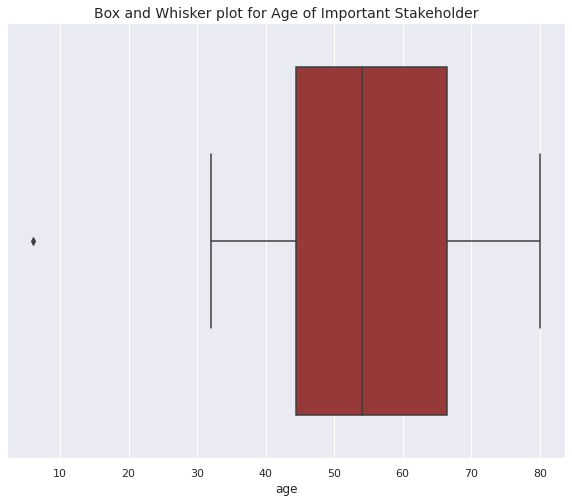

In [68]:
# Box and Whisker Plots for Age to observe outliers (if any)
box_whisker_plot(transport_people_df,'age', 'Age', title = "Box and Whisker plot for Age of Important Stakeholder")

⚠️ **Note:** Evidently, data with `Age 6` (**Year of birth 2016**) is a hindrance to accurate analysis. This `extreme outlier` must therefore be <u>removed</u> ⚠️

In [69]:
# Dropping entry where Age = 6 (Year of Birth = 2016)
transport_people_df.drop(transport_people_df[transport_people_df.age < 10].index, axis=0, inplace=True)
transport_people_df.describe()

,year,age
count,70.0000,70.0000
mean,1966.6000,55.4000
std,12.3751,12.3751
min,1942.0000,32.0000
25%,1955.2500,45.5000
50%,1967.5000,54.5000
75%,1976.5000,66.7500
max,1990.0000,80.0000


⚠️ **Note:** <u>The dataset is now ready to undergo analysis of equal opportunity in three metrics: Age, Gender and Nationality in coming sections</u> ⚠️

## 5.4 Age Diversity<a id='age2'></a>

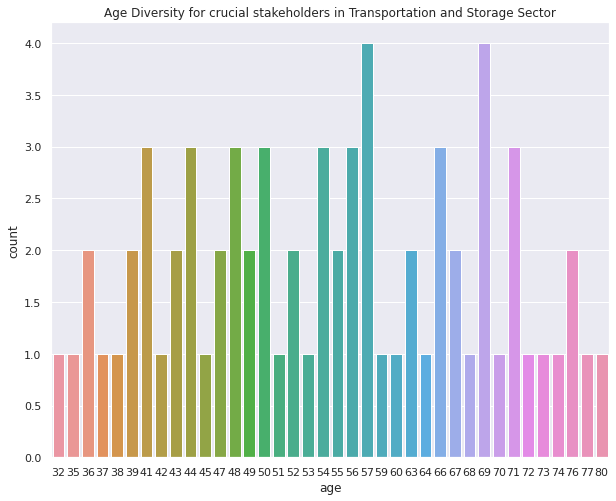

In [70]:
# Analysing age of important stakeholders
count_plot(transport_people_df, "age", title = "Age Diversity for crucial stakeholders in Transportation and Storage Sector")

✴️ **Observations:** 

* The `age` of important stakeholders in the Transportation and Storage industry is for most counts `uniformly distributed`
* There is <u>no visible sign of conducted ageism</u> since the age group of stakehodlers varies uniformly ranging from age group of `30s` to even those of `80s` 
* A significant work experience is required to acheive a crucial position in the firm and a minimum age of reaching this stakeholder position at age `32` is acceptable

## 5.5 Gender Gap<a id='gen2'></a>

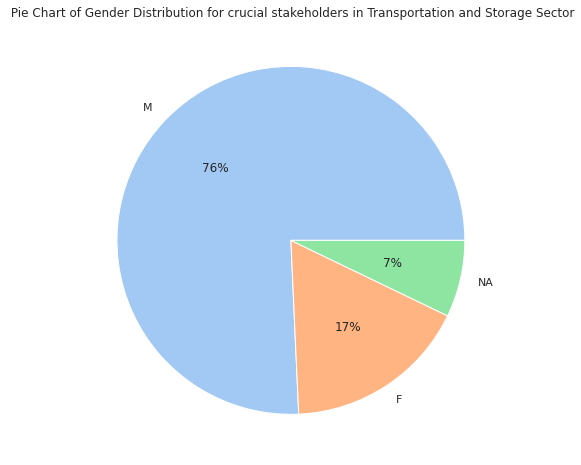

In [71]:
# Plotting gender on a pie chart
gender_keys = ['M','F','NA']
pie_chart_plot(transport_people_df['gender'].value_counts(), gender_keys, title = " Pie Chart of Gender Distribution for crucial stakeholders in Transportation and Storage Sector")

✴️ **Observations:** 

* `76%` of stakeholders in power are `men`, whereas, only a minute fraction, namely `17%` of crucial stakeholders is represented by the `female` population in this sector
* The transportation and storage sector in the United Kingdom has an evident `gender gap`
* Equal opportunities and accessibility must be made for all gender types to claim prominent positions in firms, regardless of the service sector

## 5.6 Cultural Representation<a id='culture2'></a>

In [72]:
# Percentage cultural distribution in transportation and warehousing sector
transport_people_df['nationality'].value_counts()/len(transport_people_df)

British          0.6857
English          0.0857
Polish           0.0571
Dutch            0.0571
Romanian         0.0429
Hungarian        0.0286
French           0.0143
Lithuanian       0.0143
United Kingdom   0.0143
Name: nationality, dtype: float64

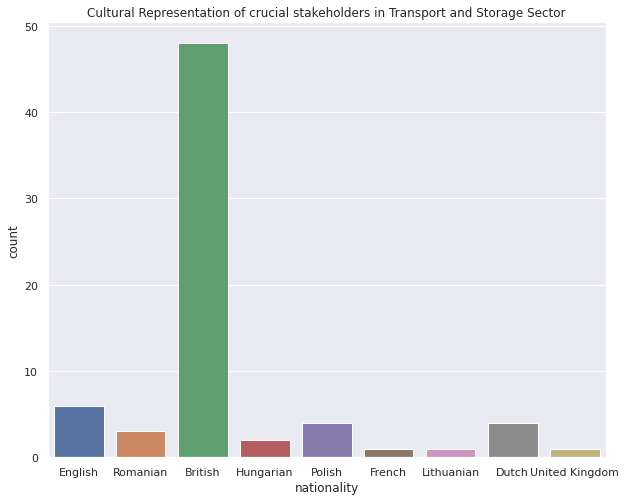

In [73]:
# Analysing nationality of important stakeholders
count_plot(transport_people_df, "nationality", title = "Cultural Representation of crucial stakeholders in Transport and Storage Sector")

✴️ **Observations:** 

* A significant portion (`78.57%`) of important `stakeholders` are `natives of the United Kingdom`, highlighted by the graphs corresponding to 'British', 'English', 'Untied Kingdom'
* This representation is followed, with a drastic difference, by the `Dutch` and `Polish` communities (`5.71%`) followed by stakeholders from `Romanian` descent (`4.29%`)
* There is `no representation` from the `asian`, `african` and `hispanic` communities, to name a few
* A <u>detailed investigation on unfair practices</u> (if any) in assigning stakeholders for firms and operations in this sector needs to be performed

## 5.6 Mini Report<a id='MR2'></a>

<i><u>Word Count: 250 words</u></i>

The ongoing global issue of inequality in workplace is a pressing matter for the government of United Kingdom who wishes to reinforce equal opportunities and representation in workplace. The government seeks an analysis on current diversity in workforce in the transportation and warehousing (storage) sector.

Companies House API data was extracted and filtered based on SIC (Standard Industrial Classification) codes to yield over `146` observational company data, which was linked to Companies Important Stakeholders API data, yielding `71` stakeholder statistics. Several pre-processing steps to convert semi-structured JSON data into flat tables, handle null and extreme values were performed. Gender and age was extracted by mapping with title and date of birth.

The transportation and storage sector showed **uniform distribution** of stakeholders in terms of their **age**, indicating no visible signs of ageism in the sector. The minimum age of a person at the stakeholder position for this sector was `32`, an age that is justifiable towards crucial work experience. While these results were promising, a **major gender gap** was observed, with male professionals claiming `76%` of the important stakeholder positions, while females occupied merely `17%` of positions. Furthermore, `78.57%` of stakeholders were `natives` followed by a minute representation of `5.71%` by the `Dutch` and `Polish` communities. There was **no representation from Asians, Africans, and Hispanics**, to name a few. A detailed investigation on unfair practices, if any, must be conducted in this sector, to ensure equal opportunities for prominent positions are available to professionals regardless of their gender and culture.

### **Visualisations as part of mini report**

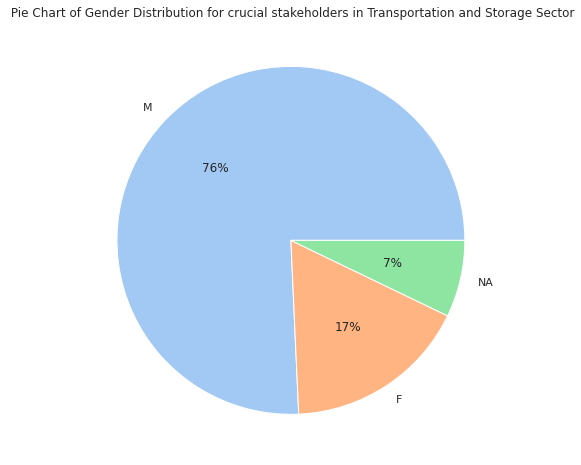

In [74]:
# PART-OF-MINI-REPORT FIGURE 1: Pie Chart Plot of Gender Gap present in Transportation and Storage sector in the United Kingdom
pie_chart_plot(transport_people_df['gender'].value_counts(), gender_keys, title = " Pie Chart of Gender Distribution for crucial stakeholders in Transportation and Storage Sector")

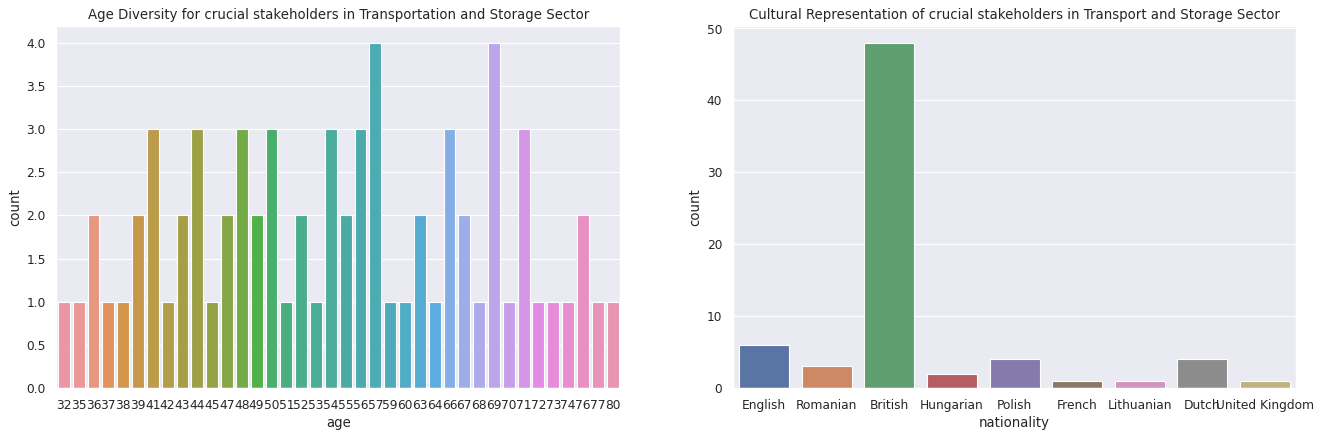

In [75]:
# PART-OF-MINI-REPORT FIGURE 2: Box Plot Distribution of Age and Nationality (Culture) of important stakeholders of Transportation and Storage sector
figure(figsize=(20, 6), dpi=80)
plt.subplot(1,2,1)
count_plot(transport_people_df, "age", title = "Age Diversity for crucial stakeholders in Transportation and Storage Sector")
plt.subplot(1,2,2)
count_plot(transport_people_df, "nationality", title = "Cultural Representation of crucial stakeholders in Transport and Storage Sector")